# Case Study: RFM Analysis for Customer Segmentation

### Contents



1. Data Exploration
2. Data Cleaning
3. Feature Engineering
4. Standardization
5. KMeans Clustering
6. Outlier Analysis
7. Combining Non-Outlier and Outlier Datasets
8. Final Takeaways

### Background

This is a transactional data set which contains all the transactions occurring between 12/01/2009 and 12/09/2010 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. 

### Data Sources
The data for this analysis was obtained from the UC Irvine Machine Learning Repository and is licensed under the Creative Commons Attribution 4.0 International License. This license permits sharing and adaptation for any purpose, provided proper credit is given.


`InvoiceNo`: Invoice number. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.  
`StockCode:` Product code. A 5-digit integral number uniquely assigned to each distinct product  
`Description`: Product name.  
`Quantity`: The quantities of each product per transaction.  
`InvoiceDate`: Invoice date and time, The day and time when a transaction was generated.  
`UnitPrice`: Product price per unit in sterling.  
`CustomerID`: Customer number. A 5-digit integral number uniquely assigned to each customer.  
`Country`: The name of the country where each customer resides.

### Objectives:  
To help online retailers identify and segment customers based on their recency, frequency, and monetary value. This enables businesses to tailor their marketing efforts, enhance customer retention, and maximize overall revenue.




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import missingno as msno

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

#show all columms on output
pd.set_option('display.max_columns',999)

## Data Exploration

In [2]:
xl = pd.ExcelFile("/Users/apple/myprojects/ProjectDatasets/online_retail_II.xlsx")
print(xl.sheet_names)

['Year 2009-2010', 'Year 2010-2011']


In [ ]:
# Using the sheet names from the 2009-2010 dataset
df = pd.read_excel("/Users/apple/myprojects/ProjectDatasets/online_retail_II.xlsx",sheet_name=0)

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
df['Customer ID'] = df['Customer ID'].astype(object)

In [7]:
df.describe()

,Quantity,InvoiceDate,Price
count,525461.00,525461,525461.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69
min,-9600.00,2009-12-01 07:45:00,-53594.36
25%,1.00,2010-03-21 12:20:00,1.25
50%,3.00,2010-07-06 09:51:00,2.10
75%,10.00,2010-10-15 12:45:00,4.21
max,19152.00,2010-12-09 20:01:00,25111.09
std,107.42,NaN,146.13


In [8]:
df.describe(include='O')

,Invoice,StockCode,Description,Customer ID,Country
count,525461,525461,522533,417534.00,525461
unique,28816,4632,4681,4383.00,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,14911.00,United Kingdom
freq,675,3516,3549,5710.00,485852


In [9]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [10]:
df['Customer ID'].isna().sum()

107927

In [11]:
df[df["Invoice"].astype(str).apply(lambda x: not (x.isdigit() and len(x) == 6))]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [12]:
# Check if the invoice number starts with the character 'C' and is followed by exactly 6 digits, with no other characters before or after
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array([nan, 'C', 'A'], dtype=object)

In [13]:
df[df["Invoice"].str.startswith("A", na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [14]:
df[~df["StockCode"].astype(str).str.fullmatch(r"\d{5}",na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


There is no additional information about the letter behind the digit, let's persume this is valid stockcode number.

In [15]:
df[~(df["StockCode"].astype(str).str.fullmatch(r"\d{5}", na=False) | 
     df["StockCode"].astype(str).str.fullmatch(r"\d{5}[a-zA-Z]", na=False))]["StockCode"].unique()

array(['POST', '79323LP', '15056BL', 'D', '79323GR', 'DCGS0058',
       'DCGS0068', 'DOT', '15056bl', 'M', 'DCGS0004', 'DCGS0076', 'C2',
       'BANK CHARGES', 'DCGS0003', 'TEST001', 'gift_0001_80', 'DCGS0072',
       'gift_0001_20', 'DCGS0044', 'TEST002', 'gift_0001_10',
       'gift_0001_50', 'DCGS0066N', 'gift_0001_30', 'PADS', '72024HC',
       'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

## Data Cleaning

In [16]:
cleaned_df = df.copy()

In [17]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")
cleaned_df = cleaned_df[cleaned_df["Invoice"].str.fullmatch(r"\d{6}",na=False)]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [18]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

cleaned_df = cleaned_df[
    (cleaned_df["StockCode"].str.fullmatch(r"\d{5}", na=False) | 
     cleaned_df["StockCode"].str.fullmatch(r"\d{5}[a-zA-Z]+", na=False) | 
     cleaned_df["StockCode"].str.fullmatch(r"PADS", na=False))
]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [19]:
cleaned_df = cleaned_df.dropna(subset=["Customer ID"])

In [20]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price
count,406337.00,406337,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99
min,1.00,2009-12-01 07:45:00,0.00
25%,2.00,2010-03-26 14:01:00,1.25
50%,5.00,2010-07-09 15:48:00,1.95
75%,12.00,2010-10-14 17:09:00,3.75
max,19152.00,2010-12-09 20:01:00,295.00
std,97.00,NaN,4.29


In [21]:
len(cleaned_df[cleaned_df["Price"] == 0])

28

In [22]:
cleaned_df = cleaned_df[cleaned_df["Price"]>0]
cleaned_df.describe()

,Quantity,InvoiceDate,Price
count,406309.00,406309,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99
min,1.00,2009-12-01 07:45:00,0.00
25%,2.00,2010-03-26 14:01:00,1.25
50%,5.00,2010-07-09 15:48:00,1.95
75%,12.00,2010-10-14 17:09:00,3.75
max,19152.00,2010-12-09 20:01:00,295.00
std,97.00,NaN,4.29


In [23]:
cleaned_df["Price"].min()

0.001

In [24]:
len(cleaned_df)/len(df)

0.7732429238325965

Droped about 23% of records

**How does KMeans clustering work?**

## Feature Engineering

In [25]:
#create new feature total_amount
cleaned_df["SalesTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [26]:
aggregated_df = cleaned_df.groupby("Customer ID",as_index=False).agg(
        MonetaryValue = ("SalesTotal","sum"),
        Frequency = ("Invoice","nunique"),
        LastInvoiceDate = ("InvoiceDate","max")  
    )
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [27]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

In [28]:
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


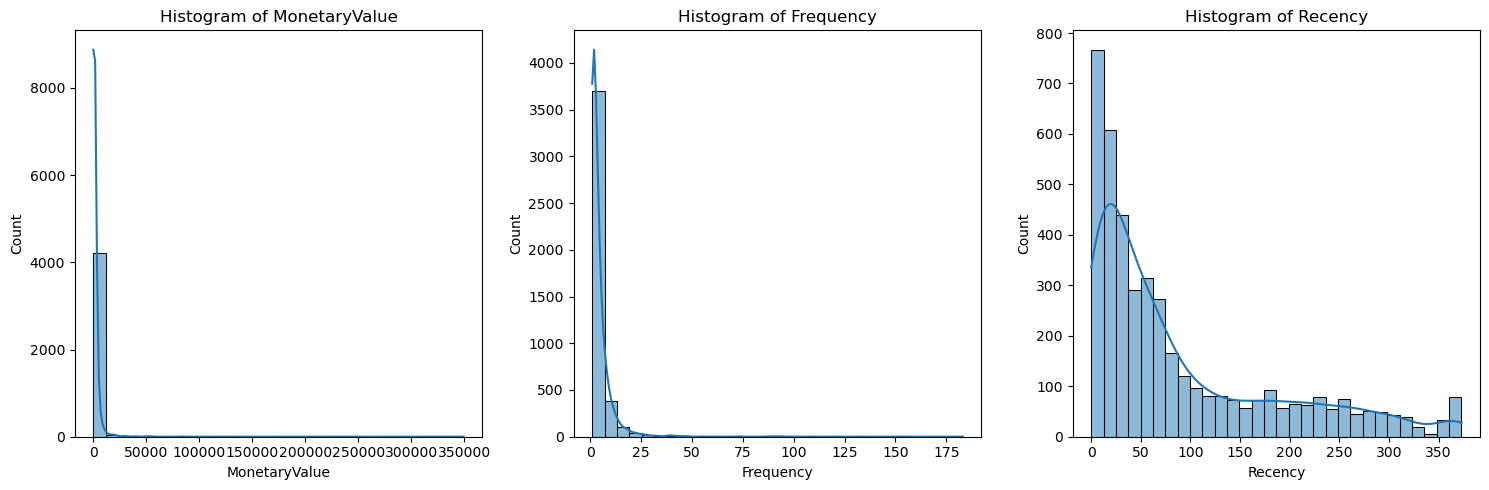

In [29]:
plt.figure(figsize=(15,5))

for i,col in enumerate(['MonetaryValue','Frequency','Recency'],1):
    plt.subplot(1,3,i)
    sns.histplot(aggregated_df[col],bins=30,kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


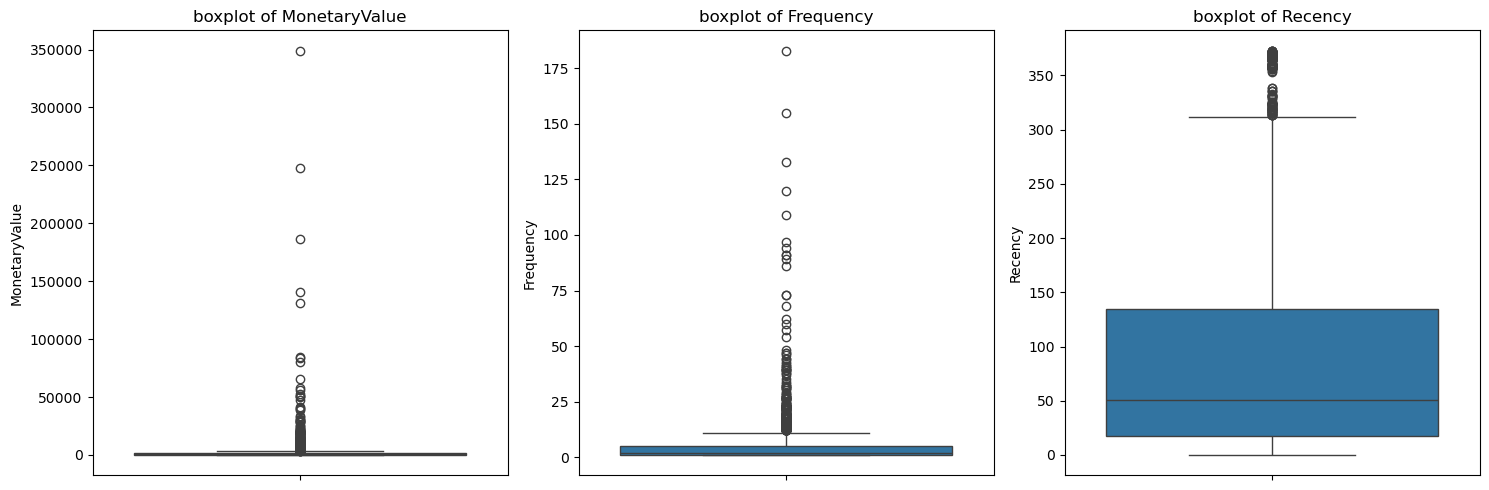

In [30]:
plt.figure(figsize=(15,5))

for i,col in enumerate(['MonetaryValue','Frequency','Recency'],1):
    plt.subplot(1,3,i)
    sns.boxplot(y=aggregated_df[col])
    plt.title(f'boxplot of {col}')
plt.tight_layout()
plt.show()


since the outlier are high value customer, we will sepereate out the outlier data for other analysis.

In [31]:
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

Monetary_outliers_df = aggregated_df[(aggregated_df['MonetaryValue'] > (M_Q3 + 1.5*M_IQR)) | (aggregated_df['MonetaryValue'] < (M_Q1 - 1.5*M_IQR))].copy()
Monetary_outliers_df.describe()

,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423,423.00
mean,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,10273.24,18.00,2010-12-06 10:34:30,31.00
max,349164.35,183.00,2010-12-09 19:32:00,364.00
std,25830.85,19.73,NaN,51.54


In [32]:
M_Q1 = aggregated_df['Frequency'].quantile(0.25)
M_Q3 = aggregated_df['Frequency'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (M_Q3 + 1.5*M_IQR)) | (aggregated_df['Frequency'] < (M_Q1 - 1.5*M_IQR))].copy()
frequency_outliers_df.describe()

,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279,279.00
mean,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,11692.41,23.00,2010-12-07 11:08:30,19.00
max,349164.35,183.00,2010-12-09 19:32:00,211.00
std,31381.74,21.93,NaN,26.59


In [33]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(Monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]
non_outliers_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


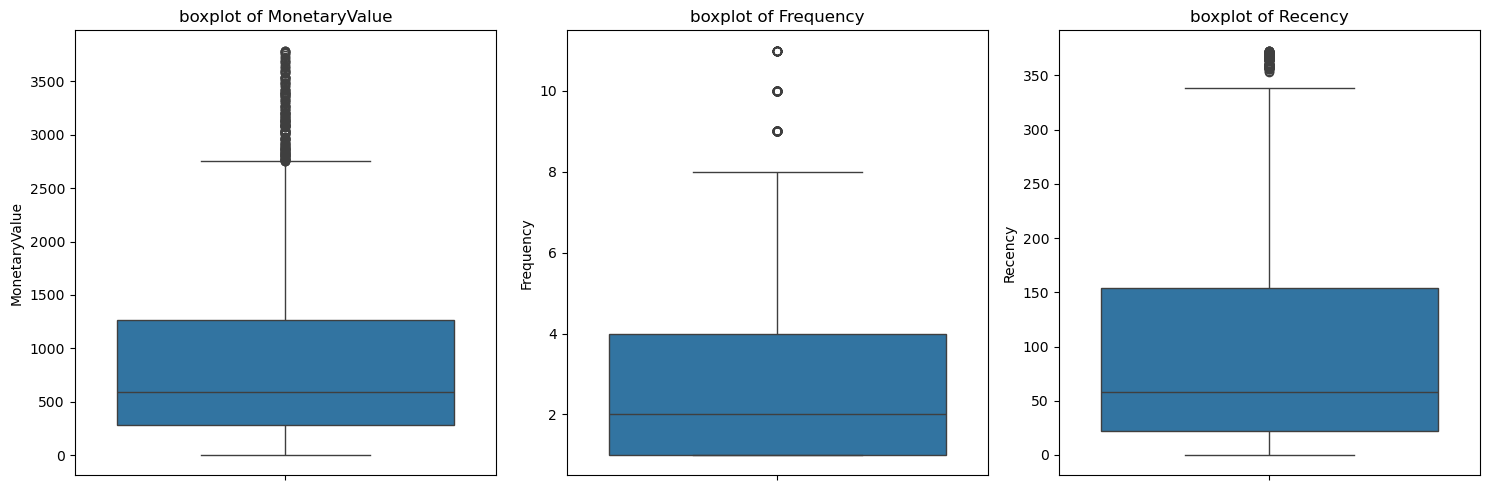

In [34]:
plt.figure(figsize=(15,5))

for i,col in enumerate(['MonetaryValue','Frequency','Recency'],1):
    plt.subplot(1,3,i)
    sns.boxplot(y=non_outliers_df[col])
    plt.title(f'boxplot of {col}')
plt.tight_layout()
plt.show()

Text(0.5, 0.92, '3D Scatter Plot of RFM Metrics')

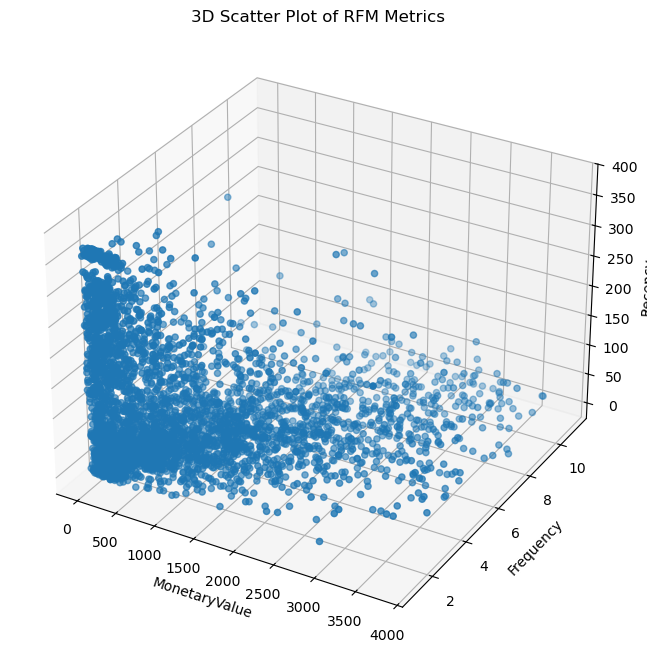

In [35]:
fig,ax = plt.subplots(subplot_kw={"projection":"3d"},figsize=(8,8))

ax.scatter(
    non_outliers_df["MonetaryValue"],
    non_outliers_df["Frequency"],
    non_outliers_df["Recency"])
ax.set(xlabel="MonetaryValue",ylabel = "Frequency",zlabel="Recency")
ax.set_title("3D Scatter Plot of RFM Metrics")

## Standardization
Standard scaling adjusts the features of your data to have a mean of 0 and a standard deviation of 1, ensuring uniform contribution across all features in the analysis.

In [36]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])
scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [37]:
scaled_data_df = pd.DataFrame(scaled_data,index=non_outliers_df.index, columns =("MonetaryValue", "Frequency", "Recency"))
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


Text(0.5, 0.92, '3D Scatter Plot of RFM Metrics')

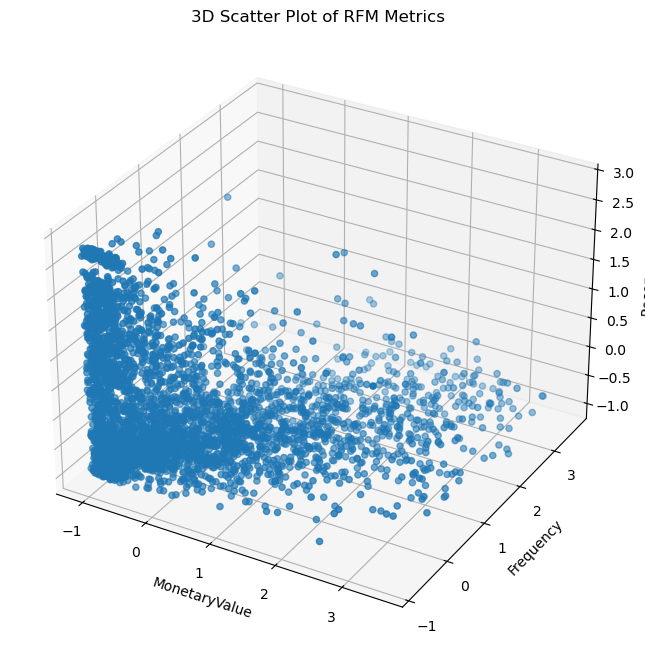

In [38]:
fig,ax = plt.subplots(subplot_kw={"projection":"3d"},figsize=(8,8))

ax.scatter(
    scaled_data_df["MonetaryValue"],
    scaled_data_df["Frequency"],
    scaled_data_df["Recency"])
ax.set(xlabel="MonetaryValue",ylabel = "Frequency",zlabel="Recency")
ax.set_title("3D Scatter Plot of RFM Metrics")

## KMeans Clustering

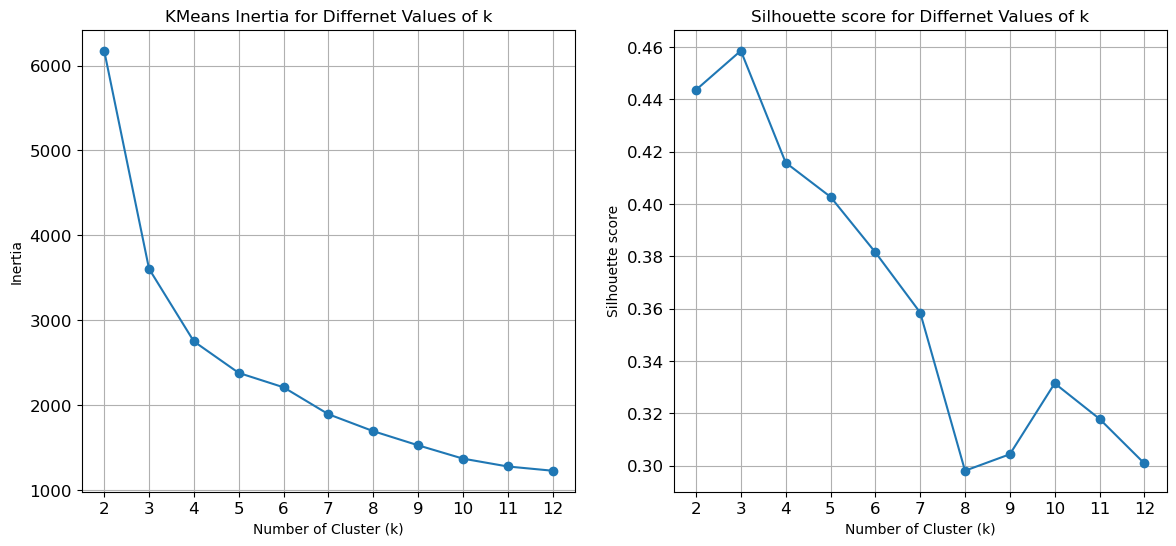

In [39]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state =42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df,cluster_labels)
    inertia.append(kmeans.inertia_)
    silhoutte_scores.append(sil_score)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Differnet Values of k')
plt.xlabel('Number of Cluster (k)')
plt.ylabel('Inertia')
plt.xticks(k_values,fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(k_values, silhoutte_scores, marker='o')
plt.title('Silhouette score for Differnet Values of k')
plt.xlabel('Number of Cluster (k)')
plt.ylabel('Silhouette score')
plt.xticks(k_values,fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

In [40]:
kmeans = KMeans(n_clusters = 4, random_state = 42, max_iter = 1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [41]:
non_outliers_df.loc[:, "Cluster"]= cluster_labels
non_outliers_df

/var/folders/c2/295g9wz16kx7185znz_1jby00000gn/T/ipykernel_28085/1743501168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df.loc[:, "Cluster"]= cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


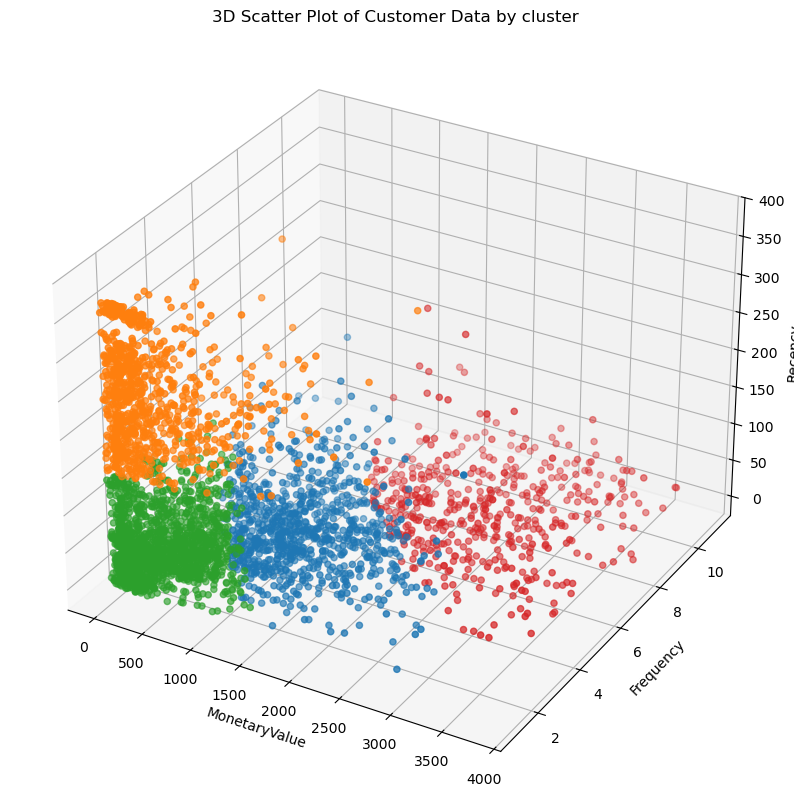

In [42]:
cluster_colors = {0:'#1f77b4', #Blue
                  1:'#ff7f0e', #Orange
                  2:'#2ca02c', #Green
                  3:'#d62728'} #Red
colors = non_outliers_df['Cluster'].map(cluster_colors)

fig,ax = plt.subplots(subplot_kw={"projection":"3d"},figsize=(10,10))

ax.scatter(non_outliers_df["MonetaryValue"],
           non_outliers_df["Frequency"],
           non_outliers_df["Recency"],
           c = colors,
           marker='o')
ax.set(xlabel="MonetaryValue",ylabel = "Frequency",zlabel="Recency")
ax.set_title('3D Scatter Plot of Customer Data by cluster')
plt.show()

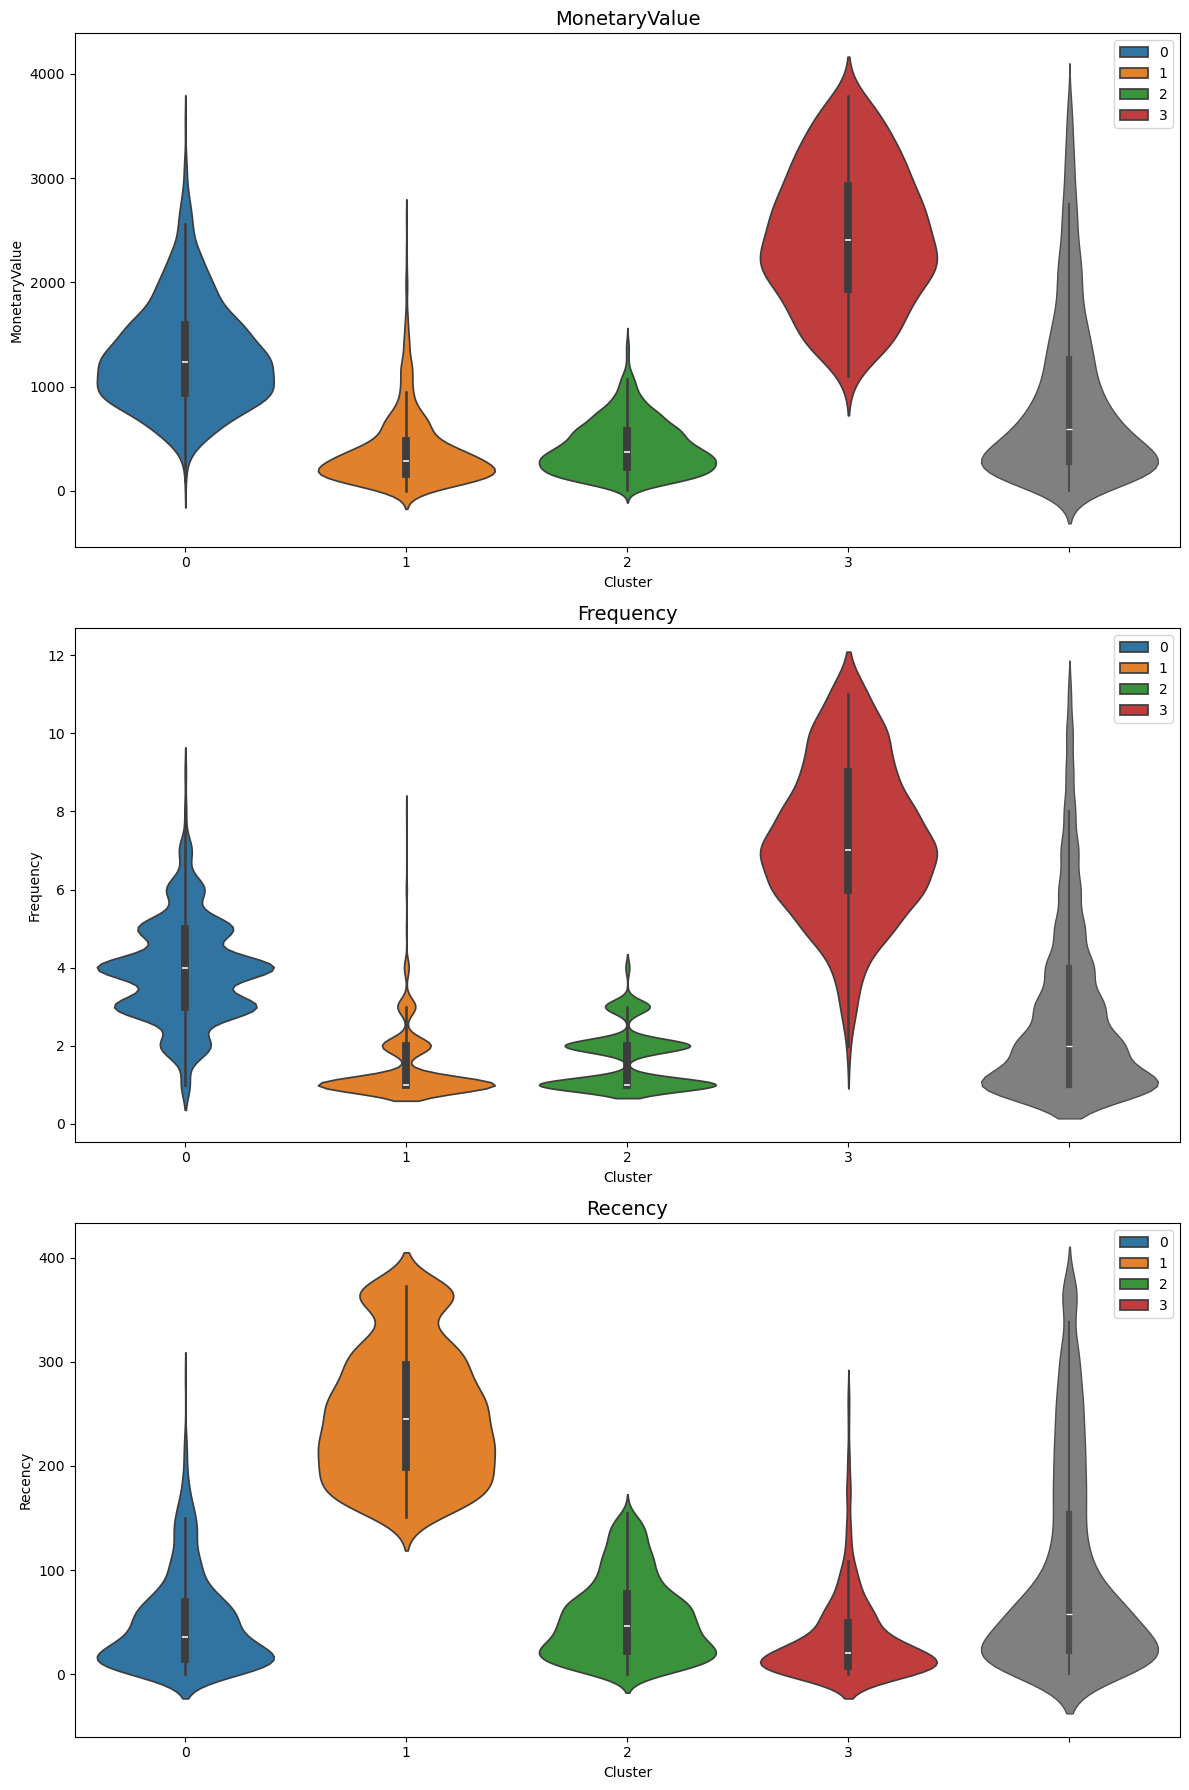

In [43]:
fig, axes = plt.subplots(nrows=3, ncols =1,figsize=(12,18))

features = ['MonetaryValue', 'Frequency', 'Recency']
titles = ['MonetaryValue', 'Frequency', 'Recency']

for i, feature in enumerate(features):
    sns.violinplot(x=non_outliers_df['Cluster'],
                    y=non_outliers_df[feature],
                    palette=cluster_colors,
                    hue=non_outliers_df['Cluster'],
                    ax=axes[i])
    sns.violinplot(y=non_outliers_df[feature],
                    color='gray',
                    linewidth=1.0,
                    ax=axes[i])
    axes[i].set_title(titles[i],fontsize=14)

plt.tight_layout()
plt.show()

In [44]:
df_segm_analysis = non_outliers_df.groupby(['Cluster']).mean()[['MonetaryValue','Frequency','Recency']]
df_segm_analysis

,MonetaryValue,Frequency,Recency
Cluster,,,
0,1308.62,3.91,49.73
1,384.54,1.43,251.17
2,417.95,1.64,54.07
3,2436.09,7.24,33.89


In [45]:
df_segm_analysis.rename({0:'Retain',
                1:'Re-Engage',
                2:'Emerging-Customers',
                3:'Loyal Spenders'})



,MonetaryValue,Frequency,Recency
Cluster,,,
Retain,1308.62,3.91,49.73
Re-Engage,384.54,1.43,251.17
Emerging-Customers,417.95,1.64,54.07
Loyal Spenders,2436.09,7.24,33.89


1.**Cluster 0 : "Retain"**  
Rationale: This group represents valuable repeat customers who spend regularly, though not always active very recently. The key focus should be on retention strtegies to sustain their loyalty and spending.

Action:
- Offer personalized communication, discounts, or loyalty rewards.
- bundling strategy

2.**Cluster 1 : "Re-Engage"**  
Rationale: This group consists of the least active and lowest-value customers, having not made a purchase in a long time, suggesting they may be inactive or lost.

Action:  
- Implement re-engagement campaigns, such as offering discounts or personalized promotions, to encourage them to return.

3.**Cluster 2 : "Emerging-Customers"**  
Rationale: This cluster are similar to Cluster1, but have made more recent purchases. They are likely new customers who haven't fully engaged yet and may be at a higher risk of churn. 

Action:  
- Build loyalty through educational marketing, personalized offers, and engagement strategies. For example, send regular email campaigns with special offers to re-engage them.


4.**Cluster 3 : "Loyal Spenders"**  
Rationale: This cluster includes high-value, highly engaged customers who remain active. They are the most loyal and committed customers.

Actionable Insight:  
- Offer exclusive rewards, premium support, or early product releases to keep them engaged.  
- Personalized recommendations may increase their lifetime value even further.


## Outlier Analysis

In [46]:
overlap_indices = Monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = Monetary_outliers_df .drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = Monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_cluster_df = pd.concat([monetary_only_outliers,frequency_only_outliers,monetary_and_frequency_outliers])
outlier_cluster_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


Assigns a distinct cluster ID for each type of outlier:

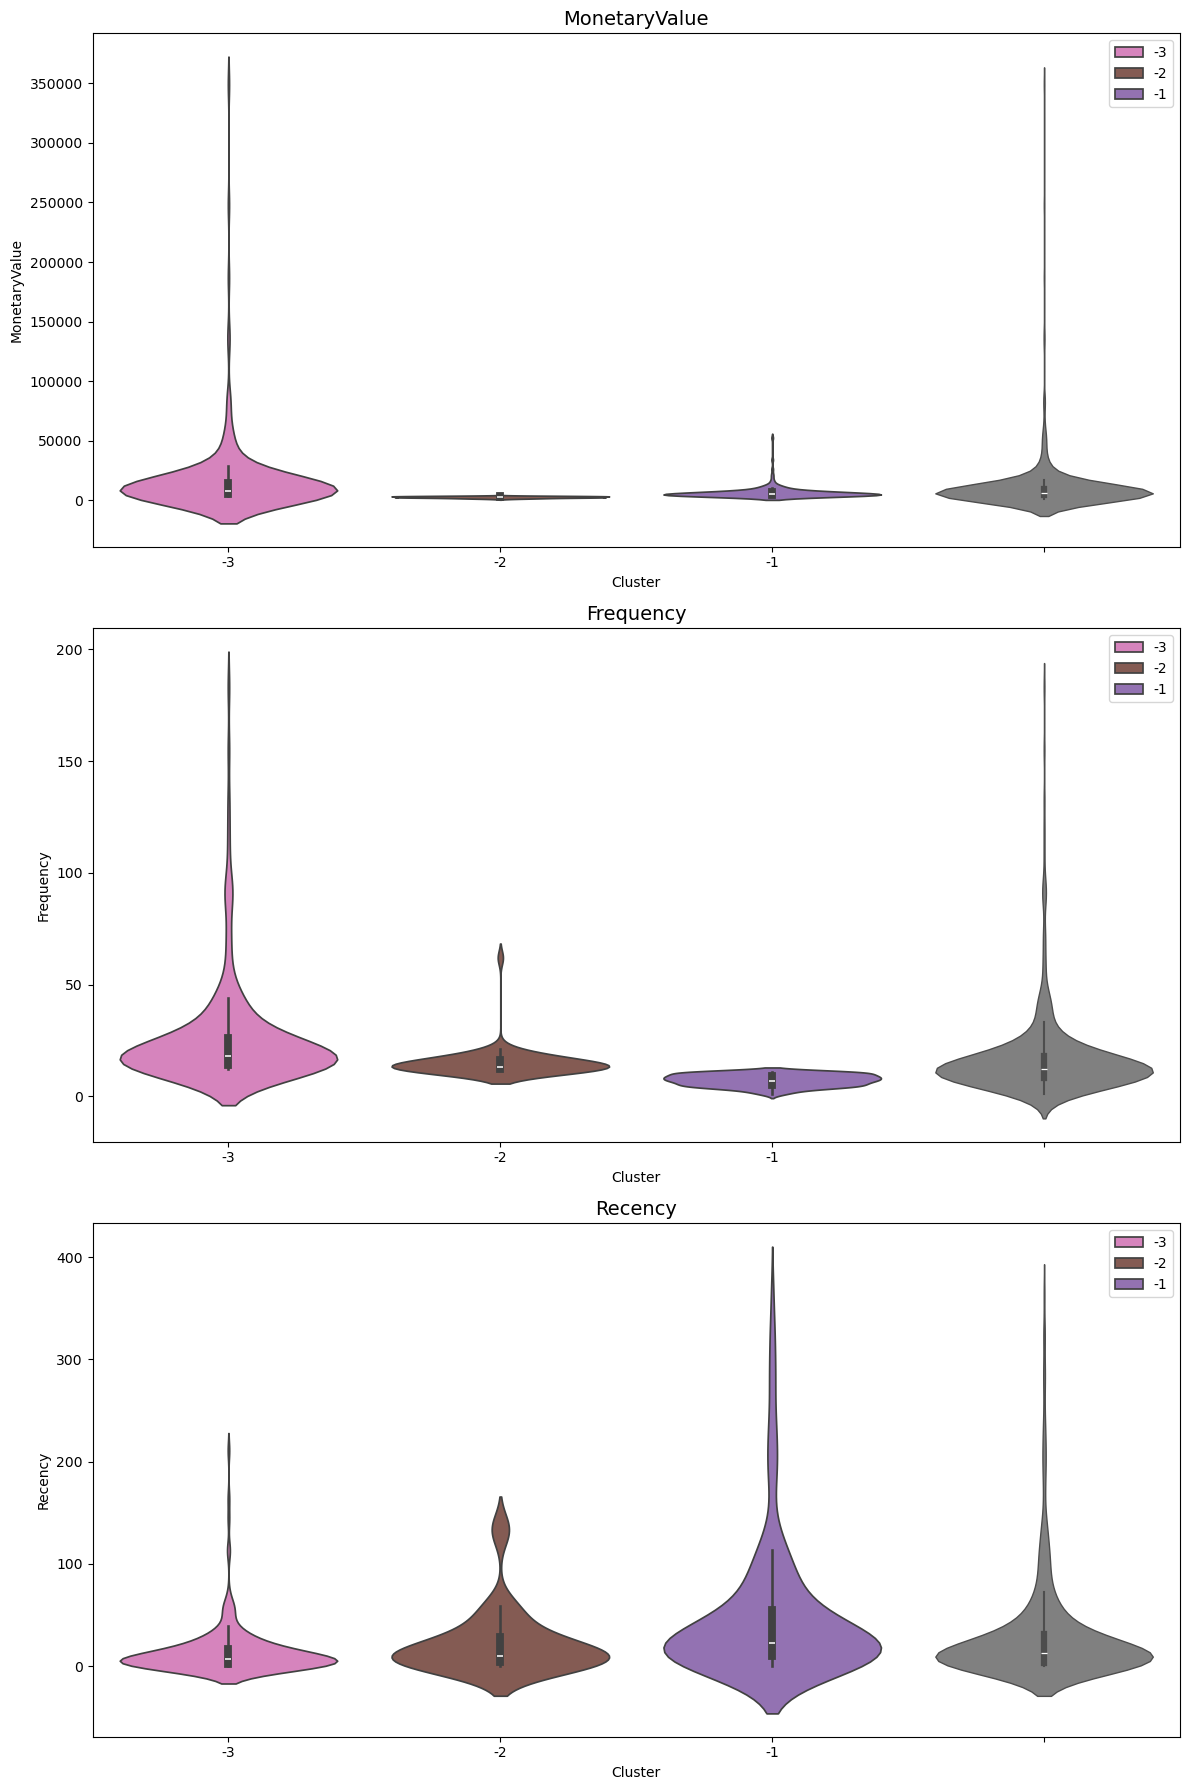

In [47]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

fig, axes = plt.subplots(nrows=3, ncols =1,figsize=(12,18))

features = ['MonetaryValue', 'Frequency', 'Recency']
titles = ['MonetaryValue', 'Frequency', 'Recency']

for i, feature in enumerate(features):
    sns.violinplot(x=outlier_cluster_df['Cluster'],
                    y=outlier_cluster_df[feature],
                    palette=cluster_colors,
                    hue=outlier_cluster_df['Cluster'],
                    ax=axes[i])
    sns.violinplot(y=outlier_cluster_df[feature],
                    color='gray',
                    linewidth=1.0,
                    ax=axes[i])
    axes[i].set_title(titles[i],fontsize=14)

plt.tight_layout()
plt.show()

**Cluster -1（Monetary Outlier): "Premium Buyers"**  
Characteristics: High spender but shop less frequently.  

Potential Strategy:  
- Targeted re-engagement campaigns

**Cluster -2 (Frequency Outliers): "High-Value Loyalists"**  
Characteristics: More frequent buyers who have a lower average spend per purchase compared to Cluster 1.  
Potential Strategy:   
- Retention strategies should focus on maintaining their loyalty through rewards.
- Provide dynamic pricing and special bundles

**Cluster -3 (monetary_and_frequency_outliers): "Pamper"**  
Characteristics: High-Value & High-Frequency Outliers
These are the best customers who spend significantly and buy very frequently. They are likely your top-tier VIP customers who drive a significant portion of revenue.

Potential Strategy: premium loyalty programs, VIP experiences, and exclusive perks.

In [48]:
cluster_labels = {
    0:"Retain", 
    1:"Re-Engage",
    2:"Emerging-Customers", 
    3:"Loyal Spenders", 
    -1:"Premium Buyers", 
    -2:"High-Value Loyalists", 
    -3:"Pamper"}  

## Combining Non-Outlier and Outlier Datasets

In [49]:
full_clustering_df = pd.concat([non_outliers_df, outlier_cluster_df])
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


In [50]:
full_clustering_df.groupby('Cluster')[['MonetaryValue','Frequency','Recency']].mean()

,MonetaryValue,Frequency,Recency
Cluster,,,
-3,17147.66,25.87,14.45
-2,2734.69,15.04,23.08
-1,6498.45,7.19,47.91
0,1308.62,3.91,49.73
1,384.54,1.43,251.17
2,417.95,1.64,54.07
3,2436.09,7.24,33.89


In [51]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,Re-Engage
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,Retain
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,Emerging-Customers
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,Retain
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,Emerging-Customers
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,Pamper
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,Pamper
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,Pamper
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,Pamper


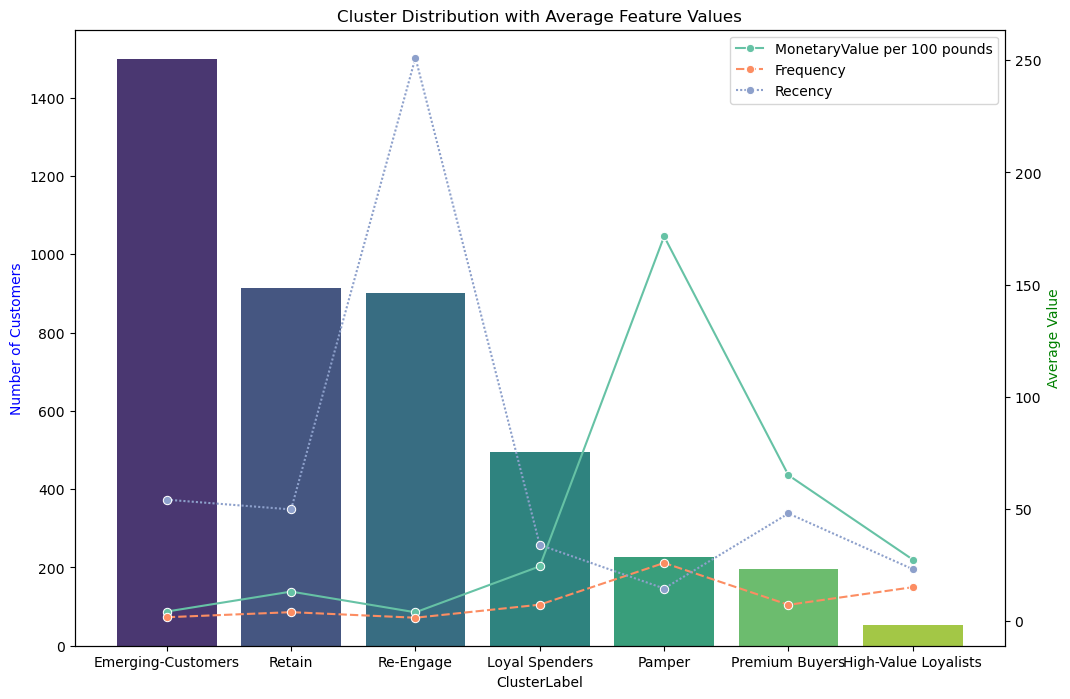

In [52]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[["MonetaryValue per 100 pounds", 'Frequency', 'Recency']].mean()

fig, ax1 = plt.subplots(figsize = (12,8))

sns.barplot(x=cluster_counts.index, y = cluster_counts.values, ax = ax1, palette = 'viridis', hue = cluster_counts.index)
ax1.set_ylabel('Number of Customers',color = 'b')
ax1.set_title('Cluster Distribution with Average Feature Values')

# Secondary y-axis for feature means
ax2 = ax1.twinx()

sns.lineplot(data= feature_means, ax=ax2, palette ='Set2', marker='o')

ax2.set_ylabel('Average Value', color = 'g')

plt.show()

## Final Takeaways:

**Pamper** : High-value, frequent, and engaged —> focus on VIP treatment.  

**High-Value Loyalists**: High-value, repeat customers -> retention & upscaling strategies.  

**Premium Buyers**: High spenders but not as frequent -> encourage repeat purchases.  

**Retain**: Steady, valuable customers but they don’t buy as often. -> focus on keeping them engaged with retention offers and loyalty incentives.  

**Re-Engage**: Low spenders with infrequent purchases and long gaps between transactions. -> use targeted promotions to bring them back.  

**Emerging-Customers**: Potential Customers, but at Risk of churning —> focus on building habits.  

**Loyal Spenders**: high-value, frequent shoppers who remain active —> loyalty rewards, exclusive access, and referral incentives to keep them engaged.
